# Demo Machine Learning

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
pd.set_option('display.max_rows', None)

### get data

In [128]:
filename = r'../Opdrachten/datasets/penguins.csv'

df = pd.read_csv(filename, index_col='rowid')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
rowid,,,,,,,,
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [244]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### EDA - Exploratory Data Analysis

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 1 to 344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.2+ KB


In [130]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [131]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [132]:
df['sex'].value_counts(dropna = False)

male      168
female    165
NaN        11
Name: sex, dtype: int64

In [133]:
df['year'].value_counts(dropna = False)

2009    120
2008    114
2007    110
Name: year, dtype: int64

In [134]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [135]:
df.boxplot()

<AxesSubplot:>

### Data Cleaning

In [136]:
df.dropna(inplace=True)

In [137]:
df['sex'].value_counts(dropna = False)

male      168
female    165
Name: sex, dtype: int64

In [138]:
df.drop('year', axis=1, inplace=True)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 344
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [140]:
string_columns = df.select_dtypes(('object','string','category')).columns

df[string_columns] = df[string_columns].astype('category')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 344
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.4 KB


### Seperate features and target

In [142]:
target_column = 'sex'
feature_columns = list(df.columns[:-1])

print('target_column:', target_column)
print('feature_columns:', feature_columns)

target_column: sex
feature_columns: ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [143]:
df_target = df[target_column]
df_features = df[feature_columns]

### Encode category variable with dummy variables

In [144]:
df_features = pd.get_dummies(df_features, drop_first=True)
df_features

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
rowid,,,,,,,,
1,39.1,18.7,181.0,3750.0,0,0,0,1
2,39.5,17.4,186.0,3800.0,0,0,0,1
3,40.3,18.0,195.0,3250.0,0,0,0,1
5,36.7,19.3,193.0,3450.0,0,0,0,1
6,39.3,20.6,190.0,3650.0,0,0,0,1
...,...,...,...,...,...,...,...,...
340,55.8,19.8,207.0,4000.0,1,0,1,0
341,43.5,18.1,202.0,3400.0,1,0,1,0
342,49.6,18.2,193.0,3775.0,1,0,1,0


### Scaling

In [145]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
numeric_columns = df.select_dtypes(('int','float')).columns

scaler = MinMaxScaler()

scaler.fit(df_features[numeric_columns])

df_features[numeric_columns] = scaler.transform(df_features[numeric_columns])

In [147]:
df_features

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
rowid,,,,,,,,
1,0.254545,0.666667,0.152542,0.291667,0,0,0,1
2,0.269091,0.511905,0.237288,0.305556,0,0,0,1
3,0.298182,0.583333,0.389831,0.152778,0,0,0,1
5,0.167273,0.738095,0.355932,0.208333,0,0,0,1
6,0.261818,0.892857,0.305085,0.263889,0,0,0,1
...,...,...,...,...,...,...,...,...
340,0.861818,0.797619,0.593220,0.361111,1,0,1,0
341,0.414545,0.595238,0.508475,0.194444,1,0,1,0
342,0.636364,0.607143,0.355932,0.298611,1,0,1,0


### Split in training and test datasets

In [148]:
from sklearn.model_selection import train_test_split

In [215]:
df_features_train, \
    df_features_test, \
    df_target_train, \
    df_target_test = train_test_split(df_features, df_target, test_size = 0.3, random_state = 12345)

In [216]:
print('df_features_train', df_features_train.shape)
print('df_target_train', df_target_train.shape)
print('df_features_test', df_features_test.shape)
print('df_target_test', df_target_test.shape)


df_features_train (233, 8)
df_target_train (233,)
df_features_test (100, 8)
df_target_test (100,)


In [217]:
df_test = pd.concat([df_features_test, df_target_test], axis=1)

## Classification

### k-Nearest Neighbors

In [218]:
from sklearn.neighbors import KNeighborsClassifier

In [219]:
classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(df_features_train, df_target_train)

KNeighborsClassifier()

In [220]:
predicted = classifier.predict(df_features_test)

df_test['5NN_predicted'] = predicted
df_test['5NN_correct'] = df_test['5NN_predicted'] == df_test['sex']

In [221]:
n_correct = df_test['5NN_correct'].sum()
n_total, _ = df_test.shape

print(f'{n_correct} of the {n_total} predictions are correct')

91 of the 100 predictions are correct


In [222]:
accuracy = n_correct / n_total

print(f'accuracy: {accuracy*100}%')

accuracy: 91.0%


## Naive Bayes

In [223]:
from sklearn.naive_bayes import GaussianNB

In [224]:
classifier = GaussianNB()

classifier.fit(df_features_train, df_target_train)

GaussianNB()

In [225]:
classifier.theta_

array([[0.35687852, 0.39233038, 0.4279286 , 0.32270157, 0.18584071,
        0.3539823 , 0.34513274, 0.15929204],
       [0.50466667, 0.5735119 , 0.55635593, 0.51487269, 0.21666667,
        0.36666667, 0.39166667, 0.14166667]])

In [226]:
classifier.var_

array([[0.03222231, 0.04666684, 0.04515807, 0.03334722, 0.15130394,
        0.22867883, 0.22601613, 0.13391808],
       [0.03723905, 0.04728284, 0.05998594, 0.0485358 , 0.16972222,
        0.23222222, 0.23826389, 0.12159722]])

In [227]:
predicted = classifier.predict(df_features_test)

df_test['NB_predicted'] = predicted
df_test['NB_correct'] = df_test['NB_predicted'] == df_test['sex']

In [228]:
n_correct = df_test['NB_correct'].sum()
n_total, _ = df_test.shape

print(f'{n_correct} of the {n_total} predictions are correct')

70 of the 100 predictions are correct


In [230]:
accuracy = n_correct / n_total

print(f'accuracy: {accuracy*100}%')

accuracy: 70.0%


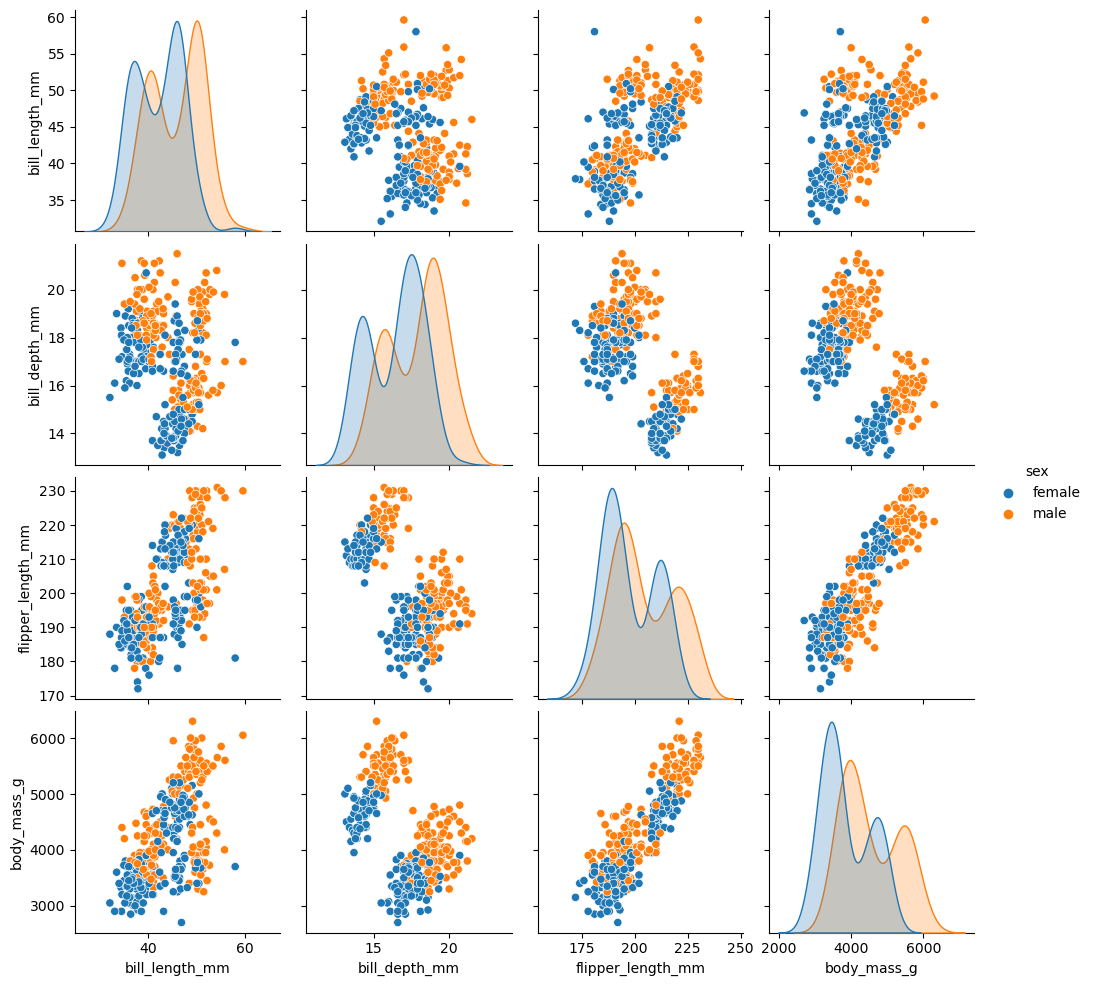

In [239]:
sns.pairplot(df, hue='sex')
plt.show()

In [233]:
columns = df_test.columns[:9]
columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'species_Chinstrap', 'species_Gentoo', 'island_Dream',
       'island_Torgersen', 'sex', '5NN_predicted', '5NN_correct',
       'NB_predicted', 'NB_correct'],
      dtype='object')

## Decision Tree

In [245]:
from sklearn.tree import DecisionTreeClassifier

In [265]:
classifier = DecisionTreeClassifier(max_depth = 3)

classifier.fit(df_features_train, df_target_train)

DecisionTreeClassifier(max_depth=3)

In [266]:
predicted = classifier.predict(df_features_test)

df_test['DT_predicted'] = predicted
df_test['DT_correct'] = df_test['DT_predicted'] == df_test['sex']

In [268]:
n_correct = df_test['DT_correct'].sum()
n_total, _ = df_test.shape

accuracy = n_correct / n_total

print(f'{n_correct} of the {n_total} predictions are correct')
print(f'accuracy: {accuracy*100}%')

87 of the 100 predictions are correct
accuracy: 87.0%


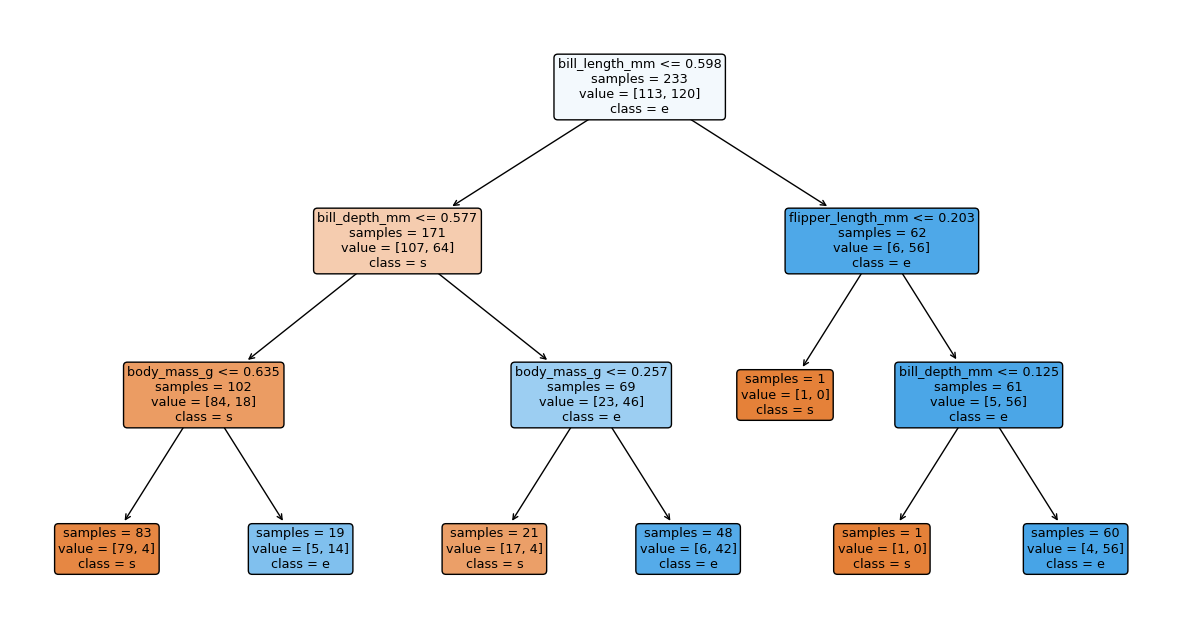

In [269]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,8))

plot_tree(classifier, 
          feature_names = df_features_train.columns,
          class_names = 'sex',
          filled = True,
          rounded = True, 
          impurity = False)
          
plt.show()

In [271]:
print('Feature Importances Decision Tree', classifier.feature_importances_)

Feature Importances Random Forest
 [0.33081546 0.27924841 0.02154607 0.36839006 0.         0.
 0.         0.        ]


In [274]:
print('Feature Importances Decision Tree')
for feature, importance in zip(df_features_train.columns, classifier.feature_importances_):
    print(f'{feature:25}: {importance:.2f}')

Feature Importances Random Forest
bill_length_mm           : 0.33
bill_depth_mm            : 0.28
flipper_length_mm        : 0.02
body_mass_g              : 0.37
species_Chinstrap        : 0.00
species_Gentoo           : 0.00
island_Dream             : 0.00
island_Torgersen         : 0.00


## Random Forest

In [280]:
from sklearn.ensemble import RandomForestClassifier

In [287]:
classifier = RandomForestClassifier(max_depth = 5, n_estimators = 20)

classifier.fit(df_features_train, df_target_train)

predicted = classifier.predict(df_features_test)

df_test['RF_predicted'] = predicted
df_test['RF_correct'] = df_test['RF_predicted'] == df_test['sex']

n_correct = df_test['RF_correct'].sum()
n_total, _ = df_test.shape

accuracy = n_correct / n_total

print(f'{n_correct} of the {n_total} predictions are correct')
print(f'accuracy: {accuracy*100}%')

91 of the 100 predictions are correct
accuracy: 91.0%


In [288]:
print('Feature Importances Random Forest')
for feature, importance in zip(df_features_train.columns, classifier.feature_importances_):
    print(f'{feature:25}: {importance:.2f}')

Feature Importances Random Forest
bill_length_mm           : 0.22
bill_depth_mm            : 0.29
flipper_length_mm        : 0.14
body_mass_g              : 0.28
species_Chinstrap        : 0.02
species_Gentoo           : 0.03
island_Dream             : 0.01
island_Torgersen         : 0.01


## Logistic Regression

In [290]:
from sklearn.linear_model import LogisticRegression

In [291]:
classifier = LogisticRegression()

classifier.fit(df_features_train, df_target_train)

predicted = classifier.predict(df_features_test)

df_test['LR_predicted'] = predicted
df_test['LR_correct'] = df_test['LR_predicted'] == df_test['sex']

n_correct = df_test['LR_correct'].sum()
n_total, _ = df_test.shape

accuracy = n_correct / n_total

print(f'{n_correct} of the {n_total} predictions are correct')
print(f'accuracy: {accuracy*100}%')

87 of the 100 predictions are correct
accuracy: 87.0%


## Support Vector Machine

In [292]:
from sklearn.svm import SVC

In [296]:
classifier = SVC(kernel = 'poly')    # 'linear' or 'poly' or 'rbf'

classifier.fit(df_features_train, df_target_train)

predicted = classifier.predict(df_features_test)

df_test['SVM_predicted'] = predicted
df_test['SVM_correct'] = df_test['SVM_predicted'] == df_test['sex']

n_correct = df_test['SVM_correct'].sum()
n_total, _ = df_test.shape

accuracy = n_correct / n_total

print(f'{n_correct} of the {n_total} predictions are correct')
print(f'accuracy: {accuracy*100}%')

89 of the 100 predictions are correct
accuracy: 89.0%


## Neural Network

In [298]:
from sklearn.neural_network import MLPClassifier

In [299]:
classifier = MLPClassifier(activation = 'relu', hidden_layer_sizes = [8, 6, 5], max_iter = 1000)

classifier.fit(df_features_train, df_target_train)

predicted = classifier.predict(df_features_test)

df_test['NN_predicted'] = predicted
df_test['NN_correct'] = df_test['NN_predicted'] == df_test['sex']

n_correct = df_test['NN_correct'].sum()
n_total, _ = df_test.shape

accuracy = n_correct / n_total

print(f'{n_correct} of the {n_total} predictions are correct')
print(f'accuracy: {accuracy*100}%')

91 of the 100 predictions are correct
accuracy: 91.0%
